In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Exploring Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [8]:
data.rename(columns={'Region':'State',
                     ' Date':'Date',
                     ' Frequency':'Frequency',
                     ' Estimated Employed':'Estimated Employed',
                     ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate',
                    ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate',
                    'Region.1':'Region'},inplace=True)

In [9]:
data.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [10]:
data.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [11]:
data['Frequency'].value_counts()

Frequency
M    267
Name: count, dtype: int64

In [12]:
numerical_data=data[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','longitude','latitude']]
numerical_data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [13]:
num_region=data['Region'].value_counts()
num_region

Region
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

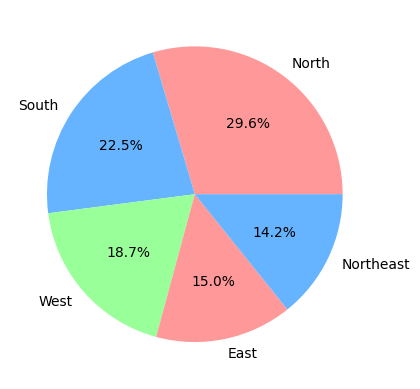

In [14]:
plt.pie(num_region,autopct='%1.1f%%',labels=num_region.index,colors= ['#ff9999','#66b3ff','#99ff99'])
plt.show()

In [15]:
data['State'].value_counts()

State
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

# Convert to DateTime & Extract Month

In [16]:
data['Date']=pd.to_datetime(data['Date'])

In [17]:
import datetime as dt
import calendar
data['Month_int']=data['Date'].dt.month
data['Month_name']=data['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [18]:
data.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


# Data Visualization

In [19]:
data.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [20]:
unemployment_state=data.groupby('State')['Estimated Unemployment Rate'].mean().sort_values()
unemployment_state

State
Meghalaya            3.866000
Assam                4.856000
Gujarat              6.376000
Odisha               6.462000
Telangana            6.833000
Madhya Pradesh       6.854000
Karnataka            7.668000
Chhattisgarh         7.819000
Maharashtra          7.979000
Andhra Pradesh       8.664000
Kerala               9.434000
Uttar Pradesh        9.737000
Sikkim               9.792500
West Bengal         10.192000
Uttarakhand         11.156000
Punjab              11.981000
Goa                 12.167000
Tamil Nadu          12.187000
Rajasthan           15.868000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Puducherry          17.942000
Delhi               18.414000
Bihar               19.471000
Jharkhand           19.539000
Tripura             25.055000
Haryana             27.477000
Name: Estimated Unemployment Rate, dtype: float64

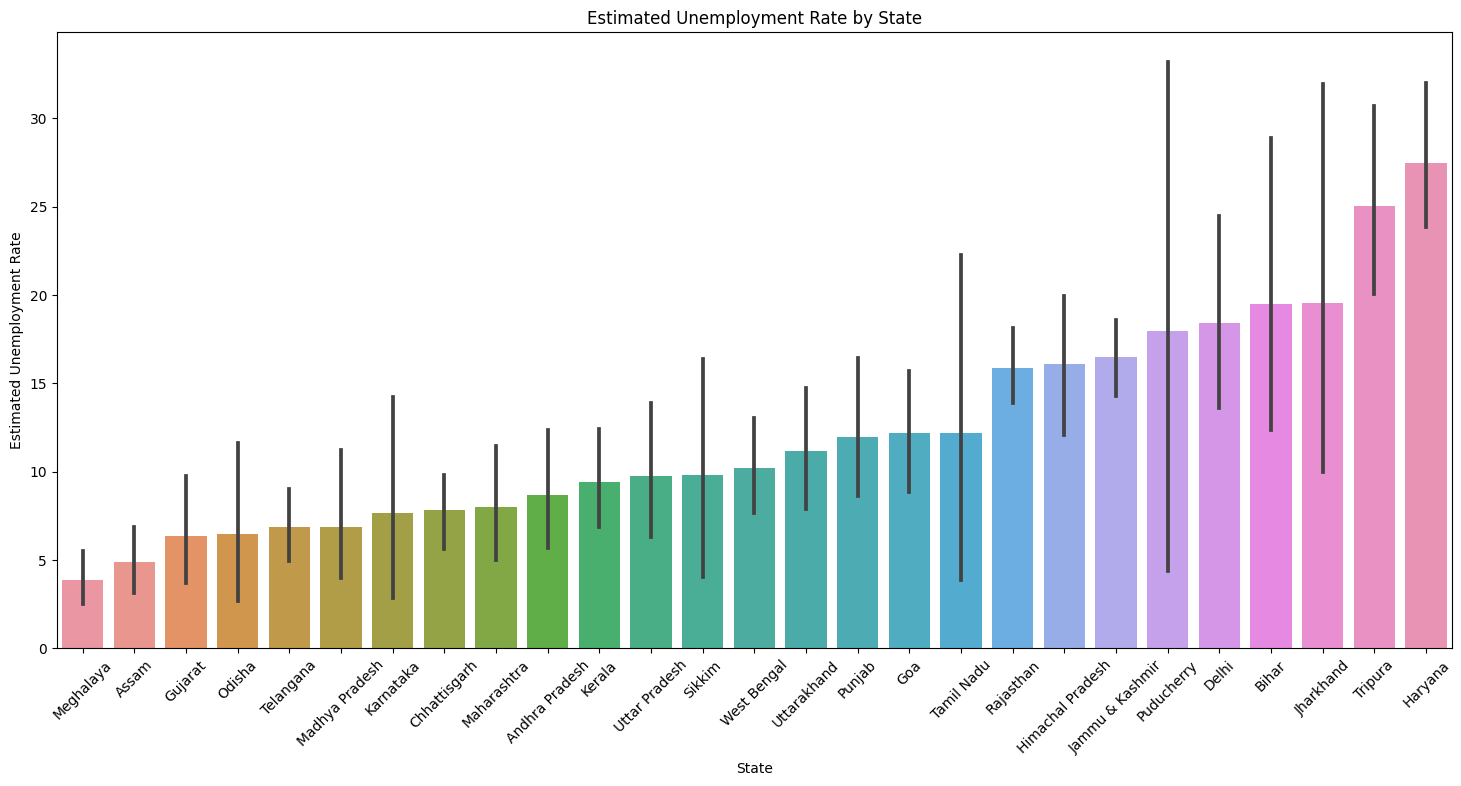

In [21]:
plt.figure(figsize=(18,8))
sns.barplot(data=data,x='State',y='Estimated Unemployment Rate',order=unemployment_state.index)
plt.title('Estimated Unemployment Rate by State')
plt.xticks(rotation=45)
plt.show()

In [22]:
employed_rgion=data.groupby('Region')['Estimated Employed'].mean().sort_values()
employed_rgion

Region
Northeast    3.617106e+06
North        1.307249e+07
South        1.404059e+07
West         1.862351e+07
East         1.960237e+07
Name: Estimated Employed, dtype: float64

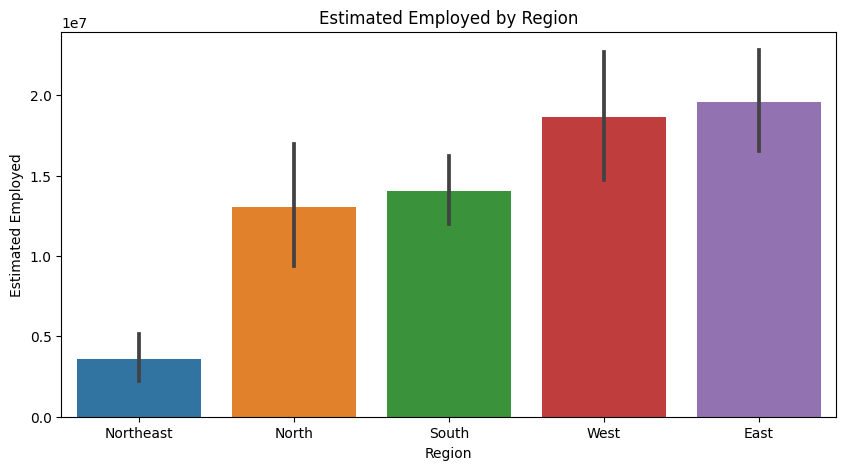

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Region',y='Estimated Employed',order=employed_rgion.index)
plt.title('Estimated Employed by Region')
plt.show()

In [24]:
region_month=data.groupby(['Region','Month_name'])['Estimated Unemployment Rate'].mean().sort_values(ascending=False)
region_month.to_frame()

Estimated Unemployment Rate
Region    Month_name                             
East      Apr                           33.725000
          May                           33.502500
South     Apr                           33.211667
          May                           26.888333
North     May                           23.683750
West      May                           16.260000
Northeast Apr                           16.150000
North     Mar                           16.066250
          Apr                           15.811429
          Jun                           15.662500
Northeast May                           15.372500
North     Aug                           15.340000
          Jul                           15.326250
Northeast Mar                           14.967500
North     Feb                           14.791250
          Jan                           14.453750
          Sep                           13.977500
          Oct                           13.773750
West      Apr                           13.738000
Northeast Jan                           12.996667
East      Jun                           12.457500
Northeast Aug                           12.420000
          Feb                           12.133333
East      Mar                           10.915000
          Aug                            9.872500
West      Jun                            8.620000
East      Oct                            8.445000
South     Jun                            8.075000
East      Sep                            7.900000
South     Jul                            7.846667
West      Jul                            7.630000
East      Feb                            7.545000
          Jan                            7.515000
          Jul                            7.282500
Northeast Jul                            7.140000
          Sep                            7.132500
          Jun                            6.980000
West      Aug                            6.928000
          Jan                            6.628000
          Oct                            5.884000
          Sep                            5.844000
South     Sep                            5.648333
West      Mar                            5.492000
          Feb                            5.366000
South     Aug                            5.321667
          Mar                            5.268333
Northeast Oct                            5.017500
South     Feb                            4.863333
          Oct                            3.875000
          Jan                            3.548333

# Numerical Data Correlation

In [25]:
corr=numerical_data.corr()

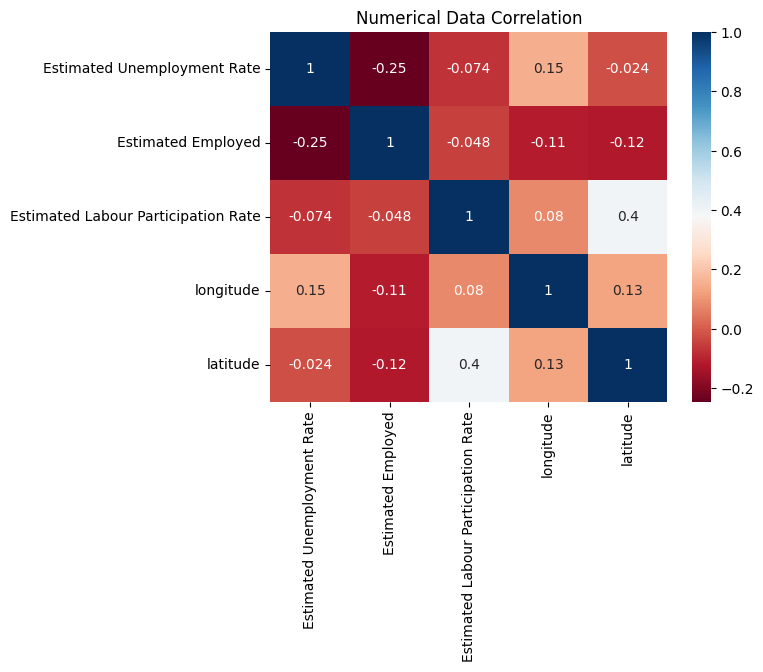

In [26]:
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.title('Numerical Data Correlation')
plt.show()